# Data Cleaning and EDA

Here we will take a closer look at the posts we have collected from TheSilphRoad and pokemongo subreddits.  

In [2]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re

from emot.emo_unicode import UNICODE_EMO, EMOTICONS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [3]:
# import status data
silph_df = pd.read_csv('../data/silph.csv')
pogo_df = pd.read_csv('../data/pogo.csv')

In [4]:
silph_df.head()

,selftext,title,subreddit
0,Has anybody found a permanent fix to not being...,Fix to not being able to attack?,TheSilphRoad
1,2 raids today where my attacks wouldn’t regist...,Attack glitch during Regi raids,TheSilphRoad
2,I’ve had a Pokémon defending a gym for over 36...,[Bug?] Can’t seem to earn or collect pokecoins...,TheSilphRoad
3,"Using an iPhone 11, so it is not an old phone ...",[Bug?] AR suddenly freezes,TheSilphRoad
4,For any data nerds I wanted to give my persona...,3 hour incense event personal results,TheSilphRoad


In [5]:
pogo_df.head()

,selftext,title,subreddit
0,Should I power up my 1103 cp charmeleon to 116...,Pokemon evolution question regarding cp potent...,pokemongo
1,I live in an empty area with a decent amount o...,Im mad and just got scammed...,pokemongo
2,I need to get sunkern or exeggcute for the mel...,Need help in getting sunkern/ exeggcute,pokemongo
3,My girlfriend recently got the Samsung Note 20...,Weird new glitch,pokemongo
4,"i dont live in range of a gym, just one pokest...",pokestops by me,pokemongo


In [6]:
# make sure that text is string to use tokenizers
silph_df = silph_df.astype(str)
pogo_df = pogo_df.astype(str)

In [7]:
# check lengths of selftext and title
silph_df['selftext_word_length'] = [len(RegexpTokenizer(r"[\w'-]+").tokenize(i)) for i in silph_df['selftext']]
silph_df['title_word_length'] = [len(RegexpTokenizer(r"[\w'-]+").tokenize(i)) for i in silph_df['title']]
silph_df.head()

,selftext,title,subreddit,selftext_word_length,title_word_length
0,Has anybody found a permanent fix to not being...,Fix to not being able to attack?,TheSilphRoad,16,7
1,2 raids today where my attacks wouldn’t regist...,Attack glitch during Regi raids,TheSilphRoad,44,5
2,I’ve had a Pokémon defending a gym for over 36...,[Bug?] Can’t seem to earn or collect pokecoins...,TheSilphRoad,36,13
3,"Using an iPhone 11, so it is not an old phone ...",[Bug?] AR suddenly freezes,TheSilphRoad,120,4
4,For any data nerds I wanted to give my persona...,3 hour incense event personal results,TheSilphRoad,142,6


In [8]:
pogo_df['selftext_word_length'] = [len(RegexpTokenizer(r"[\w'-]+").tokenize(i)) for i in pogo_df['selftext']]
pogo_df['title_word_length'] = [len(RegexpTokenizer(r"[\w'-]+").tokenize(i)) for i in pogo_df['title']]
pogo_df.head()

,selftext,title,subreddit,selftext_word_length,title_word_length
0,Should I power up my 1103 cp charmeleon to 116...,Pokemon evolution question regarding cp potent...,pokemongo,32,9
1,I live in an empty area with a decent amount o...,Im mad and just got scammed...,pokemongo,143,6
2,I need to get sunkern or exeggcute for the mel...,Need help in getting sunkern/ exeggcute,pokemongo,25,6
3,My girlfriend recently got the Samsung Note 20...,Weird new glitch,pokemongo,95,3
4,"i dont live in range of a gym, just one pokest...",pokestops by me,pokemongo,62,3


In [9]:
pogo_df.describe()

,selftext_word_length,title_word_length
count,8701.000000,8701.000000
mean,63.383634,7.298701
std,85.732012,5.657613
min,1.000000,1.000000
25%,31.000000,4.000000
50%,46.000000,6.000000
75%,71.000000,9.000000
max,4898.000000,62.000000


In [10]:
silph_df.describe()

,selftext_word_length,title_word_length
count,10683.000000,10683.000000
mean,90.162314,8.925115
std,267.365512,6.213454
min,0.000000,1.000000
25%,24.000000,5.000000
50%,45.000000,7.000000
75%,82.000000,11.000000
max,6650.000000,61.000000


Here we see that while TheSilphRoad posts on average are slightly longer than pokemongo subreddit posts, the 50 percentile self text length is almost the same between the two. My guess is that it is unlikely we will be able to build a model using post length as the similarity between the 2 subreddits is too strong. 

In [11]:
# remove emojis and emoticons from posts
# thanks to this article for emoji unicode codes and removing : https://towardsdatascience.com/text-preprocessing-for-data-scientist-3d2419c8199d

def remove_emoji(string):
    emojis = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        "]+", flags=re.UNICODE)
    return emojis.sub(r'', string)
    
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)
    
silph_df['selftext'] = silph_df['selftext'].apply(remove_emoji)
silph_df['title'] = silph_df['title'].apply(remove_emoji)
pogo_df['selftext'] = pogo_df['selftext'].apply(remove_emoji)
pogo_df['title'] = pogo_df['title'].apply(remove_emoji)

silph_df['selftext'] = silph_df['selftext'].apply(remove_emoticons)
silph_df['title'] = silph_df['title'].apply(remove_emoticons)
pogo_df['selftext'] = pogo_df['selftext'].apply(remove_emoticons)
pogo_df['title'] = pogo_df['title'].apply(remove_emoticons)

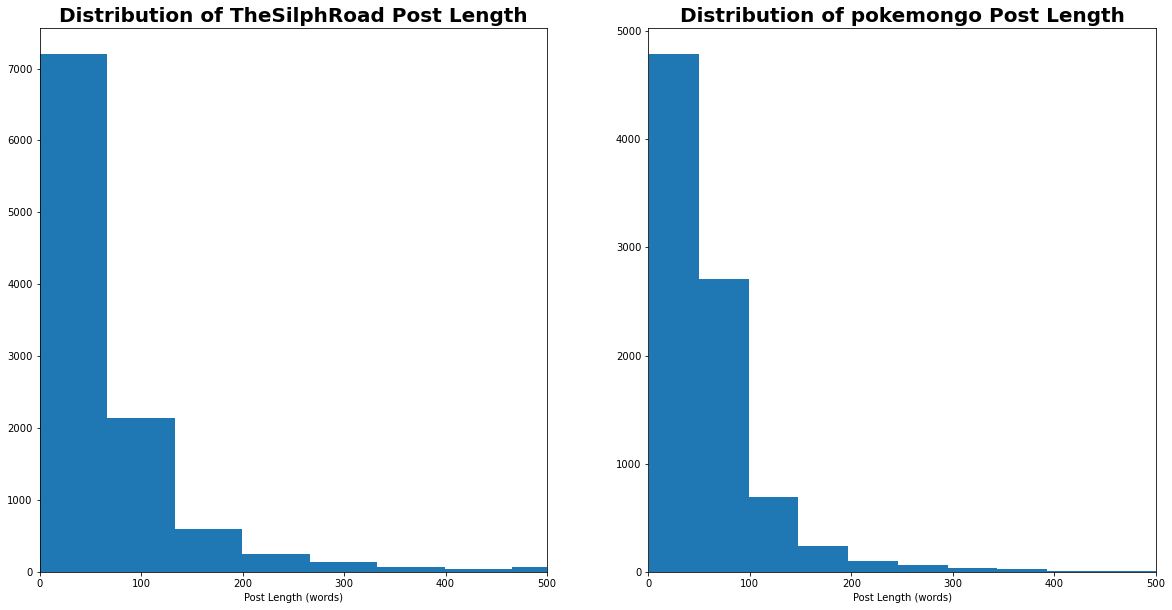

In [15]:
# plot the distribution of word length for self-text between the two subreddits
fig, ax = plt.subplots(1,2, figsize = (20, 10))
ax[0].hist(silph_df['selftext_word_length'], bins = 100)
ax[0].set_xlim(0, 500)
ax[0].set_xlabel('Post Length (words)')
ax[0].set_title('Distribution of TheSilphRoad Post Length', fontsize = 20, fontweight = 'bold')
ax[1].hist(pogo_df['selftext_word_length'], bins = 100)
ax[1].set_xlim(0, 500)
ax[1].set_xlabel('Post Length (words)')
ax[1].set_title('Distribution of pokemongo Post Length', fontsize = 20, fontweight = 'bold');

Here we can see that most posts are short in text which we expected after looking at our summary statistics above. 

In [16]:
# merge together title and selftext
silph_df['merged_text'] = silph_df['title'] + ' ' + silph_df['selftext']
pogo_df['merged_text'] = pogo_df['title'] + ' ' + pogo_df['selftext']

## Checking word counts on the 2 Subreddits

In [17]:
# create a custom stop words list to remove obvious words that will help determine one of these two subreddits

# start with the base english stopwords
new_stopwords = stopwords.words('english')

# add stopwords that will easily identify a silph post
custom_words = ['silph', 'road', 'silphroad', 'thesilphroad']

new_stopwords.extend(custom_words)

In [15]:
# initialize CountVectorizer

cvec_pogo = CountVectorizer(stop_words = new_stopwords, strip_accents = 'unicode')
cvec_silph = CountVectorizer(stop_words = new_stopwords, strip_accents = 'unicode')
X_pogo = pogo_df['selftext']

X_pogo = cvec_pogo.fit_transform(X_pogo)
pogo_selftext = pd.DataFrame(X_pogo.todense(), columns = cvec_pogo.get_feature_names())

# list the 15 most common words on pokemongo subreddit
pogo_selftext.sum().sort_values(ascending = False).head(15)

pokemon    5205
get        3329
one        2441
like       1956
go         1906
know       1821
would      1753
shiny      1693
game       1690
anyone     1532
time       1471
got        1369
raid       1263
day        1253
level      1240
dtype: int64

In [16]:
X_silph = silph_df['selftext']

X_silph = cvec_silph.fit_transform(X_silph)
silph_selftext = pd.DataFrame(X_silph.todense(), columns = cvec_silph.get_feature_names())

# list the 15 most common words on TheSilphRoad subreddit
silph_selftext.sum().sort_values(ascending = False).head(15)

pokemon    6705
get        3962
https      3617
one        3313
com        3234
like       2939
would      2648
mega       2614
amp        2490
go         2348
time       2322
game       2253
raid       2167
know       2073
new        1992
dtype: int64

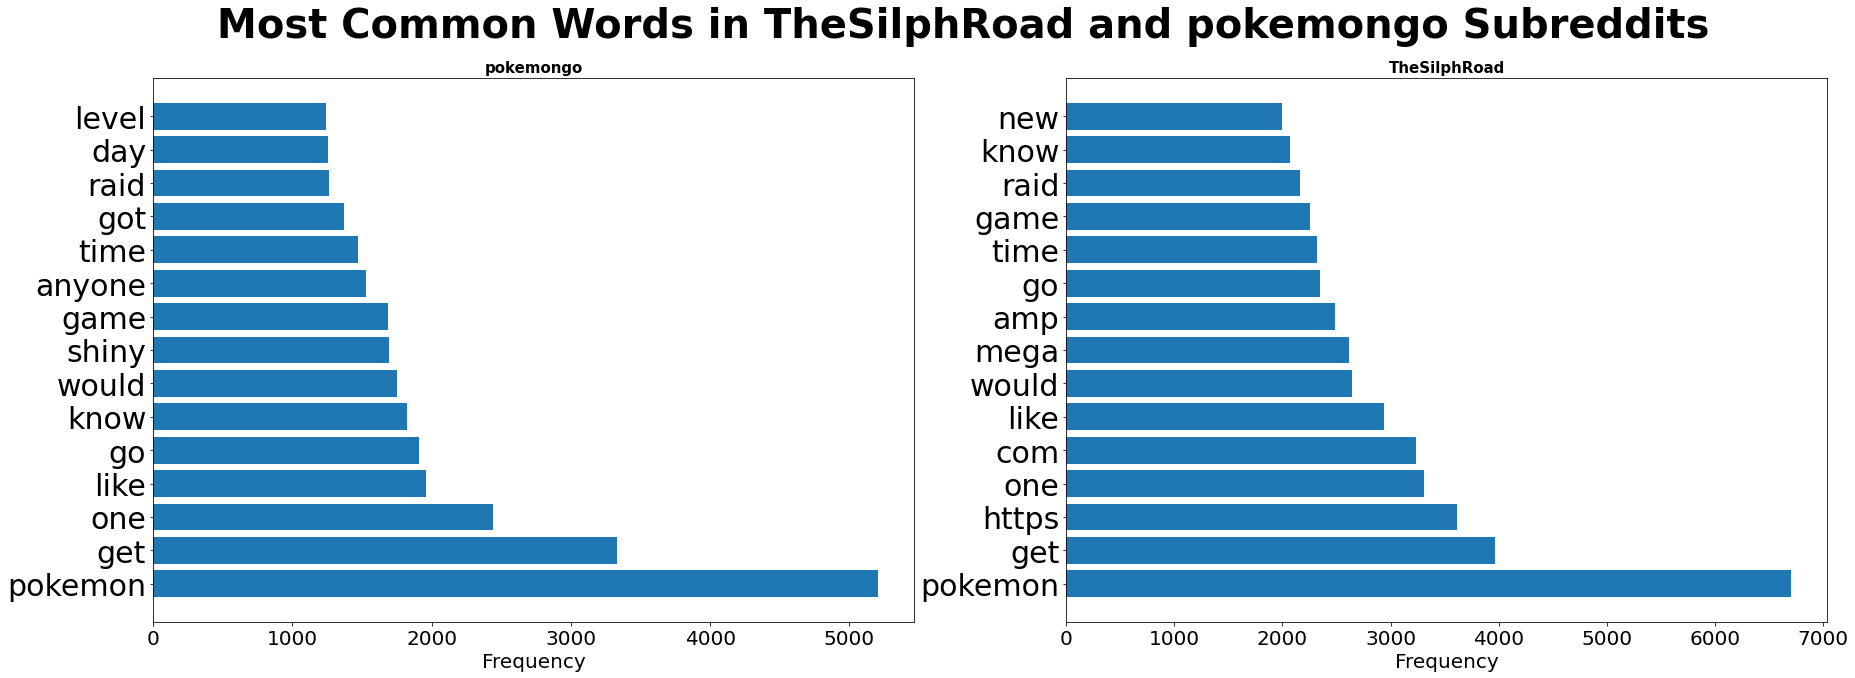

In [17]:
# plot the most common words on bar charts

fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax[0].barh(pogo_selftext.sum().sort_values(ascending = False).head(15).index, pogo_selftext.sum().sort_values(ascending = False).head(15))
ax[0].set_title('pokemongo', fontsize = 15, fontweight = 'bold')
ax[1].barh(silph_selftext.sum().sort_values(ascending = False).head(15).index, silph_selftext.sum().sort_values(ascending = False).head(15))
ax[1].set_title('TheSilphRoad', fontsize = 15, fontweight = 'bold')
for axes in ax:
    axes.set_xlabel('Frequency', fontsize = 20)
    axes.yaxis.set_tick_params(labelsize = 30)
    axes.xaxis.set_tick_params(labelsize = 20)
fig.suptitle('Most Common Words in TheSilphRoad and pokemongo Subreddits', fontsize = 40, fontweight = 'bold');

Here we see that the most common words are very similar between TheSilphRoad and pokemongo subreddit. We will now add some more stopwords so that we can actually determine which words can be used to distinguish the 2 subreddits. 

In [18]:
# create a custom stop words list to remove obvious words that will help determine one of these two subreddits

# start with the base english stopwords
new_stopwords = stopwords.words('english')

# add stopwords that are common in both subreddits
custom_words = ['silph', 'road', 'silphroad', 'thesilphroad', 'pokemon', 'go', 'get', 'one', 'like', 'would', 'know', 'time', 'game', 'shiny', 
               'https', 'raid', 'anyone', 'got', 'new', 'event', 'day', 'level', 'even', 'com', 'raids', 'still', 'people', 'also', 'since',
               'use', 'catch', 'amp', 'see', 'want', 'could', 'first', 'research', 'shadow', 'think', 'else', 'way', 'niantic', 'make', 
               'back', 'really', 'need', 'eggs', 'community', 'something', 'much', 'good', 'able']

new_stopwords.extend(custom_words)

In [19]:
# initialize CountVectorizer

cvec_pogo = CountVectorizer(stop_words = new_stopwords, strip_accents = 'unicode')
cvec_silph = CountVectorizer(stop_words = new_stopwords, strip_accents = 'unicode')
X_pogo = pogo_df['selftext']

X_pogo = cvec_pogo.fit_transform(X_pogo)
pogo_selftext = pd.DataFrame(X_pogo.todense(), columns = cvec_pogo.get_feature_names())

# list the 15 most common words on pokemongo subreddit
pogo_selftext.sum().sort_values(ascending = False).head(15)

help       773
evolve     764
friends    741
getting    698
every      696
cp         675
find       657
playing    654
play       647
caught     634
days       615
thanks     607
today      596
imgur      579
best       576
dtype: int64

In [20]:
X_silph = silph_df['selftext']

X_silph = cvec_silph.fit_transform(X_silph)
silph_selftext = pd.DataFrame(X_silph.todense(), columns = cvec_silph.get_feature_names())

# list the 15 most common words on TheSilphRoad subreddit
silph_selftext.sum().sort_values(ascending = False).head(15)

mega        2614
battle      1947
11          1482
10          1277
move        1274
pvpoke      1255
candy       1239
15          1224
text        1197
egg         1173
league      1126
www         1120
great       1095
resource    1068
many        1049
dtype: int64

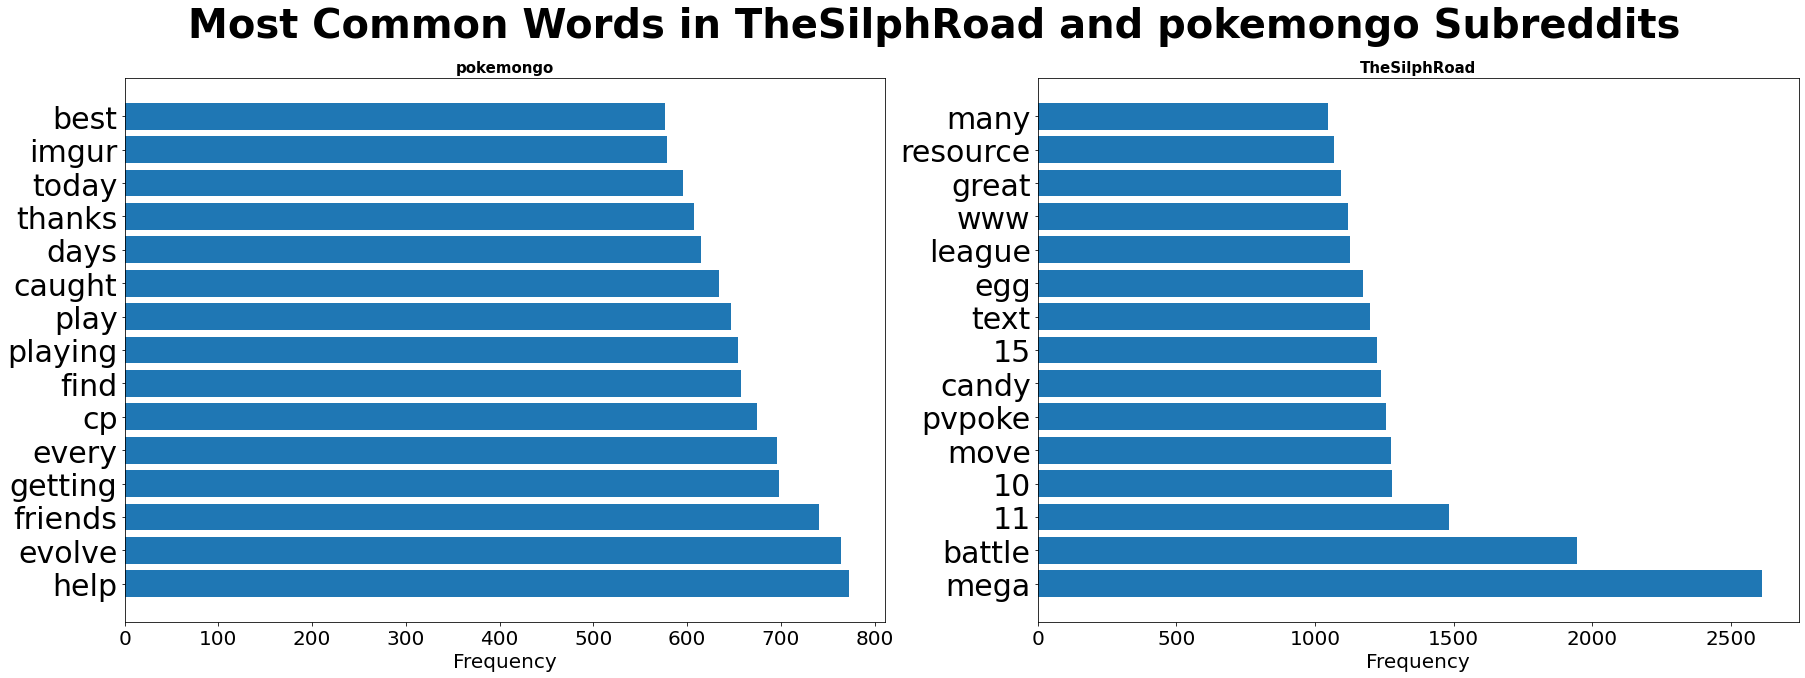

In [21]:
# plot the most common words on bar charts

fig, ax = plt.subplots(1, 2, figsize = (30, 10))
ax[0].barh(pogo_selftext.sum().sort_values(ascending = False).head(15).index, pogo_selftext.sum().sort_values(ascending = False).head(15))
ax[0].set_title('pokemongo', fontsize = 15, fontweight = 'bold')
ax[1].barh(silph_selftext.sum().sort_values(ascending = False).head(15).index, silph_selftext.sum().sort_values(ascending = False).head(15))
ax[1].set_title('TheSilphRoad', fontsize = 15, fontweight = 'bold')
for axes in ax:
    axes.set_xlabel('Frequency', fontsize = 20)
    axes.yaxis.set_tick_params(labelsize = 30)
    axes.xaxis.set_tick_params(labelsize = 20)
fig.suptitle('Most Common Words in TheSilphRoad and pokemongo Subreddits', fontsize = 40, fontweight = 'bold');

In [22]:
# merge silph and pokemongo subreddits

merged_df = pd.concat([silph_df, pogo_df], axis = 0)
merged_df.head()

,selftext,title,subreddit,selftext_word_length,title_word_length,merged_text
0,Has anybody found a permanent fix to not being...,Fix to not being able to attack?,TheSilphRoad,16,7,Fix to not being able to attack? Has anybody f...
1,2 raids today where my attacks wouldn’t regist...,Attack glitch during Regi raids,TheSilphRoad,44,5,Attack glitch during Regi raids 2 raids today ...
2,I’ve had a Pokémon defending a gym for over 36...,[Bug?] Can’t seem to earn or collect pokecoins...,TheSilphRoad,36,13,[Bug?] Can’t seem to earn or collect pokecoins...
3,"Using an iPhone 11, so it is not an old phone ...",[Bug?] AR suddenly freezes,TheSilphRoad,120,4,"[Bug?] AR suddenly freezes Using an iPhone 11,..."
4,For any data nerds I wanted to give my persona...,3 hour incense event personal results,TheSilphRoad,142,6,3 hour incense event personal results For any ...


In [25]:
merged_df.shape

(19254, 6)

In [26]:
merged_df['subreddit'].value_counts()

TheSilphRoad    10611
pokemongo        8643
Name: subreddit, dtype: int64

In [27]:
merged_df.drop(columns = ['selftext_word_length', 'title_word_length', 'selftext', 'title'], axis = 1, inplace = True)

In [28]:
merged_df.to_csv('../data/merged.csv', index = False)